In [88]:
!pip install opencv.python

  Using cached opencv_python-4.4.0.42-cp38-cp38-win_amd64.whl (33.5 MB)


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\cv2.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [89]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

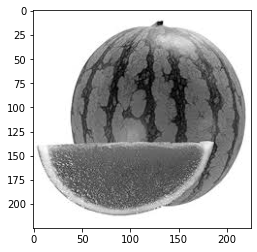

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(225, 225)


In [90]:
img = cv2.imread('dataset/melon/1.jpg',0)
plt.imshow(img, cmap='gray')
plt.show()
print(img)
print(img.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


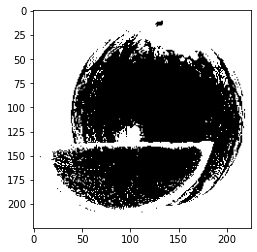

In [91]:
ret, img_bw = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print(img_bw)
plt.imshow(img_bw, cmap='gray')
plt.show()

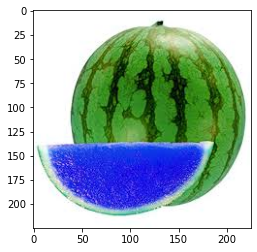

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
(225, 225, 3)
[143.61999012 170.96171852 166.03120988]


In [92]:
img = cv2.imread('dataset/melon/1.jpg')
plt.imshow(img, cmap='gray')
plt.show()
print(img)
print(img.shape)
print(np.mean(img,axis=(0,1)))

In [93]:
import os
import cv2
import numpy as np

x = []
basePath = './dataset/'
for folder in os.scandir(basePath):
    if folder.is_dir():
        for file in os.scandir(folder):
            img = cv2.imread(file.path)
            features = np.mean(img,axis=(0,1)).tolist()
            features.append(folder.name)
            x.append(features)
            
print(x)

[[163.4299861111111, 219.08794722222223, 249.62398333333334, 'lemon'], [201.02937777777777, 240.56542222222222, 247.78895555555556, 'lemon'], [197.48817127325196, 229.5385286518048, 243.80198208073736, 'lemon'], [175.492492, 226.423316, 233.148176, 'lemon'], [166.0184111111111, 221.49526111111112, 239.03005277777777, 'lemon'], [163.5342, 220.3668076388889, 240.67782777777776, 'lemon'], [166.01748333333333, 221.49644166666667, 239.0075361111111, 'lemon'], [168.173213610586, 233.0009640831758, 251.5780482041588, 'lemon'], [200.9878111111111, 240.56435555555555, 247.7027111111111, 'lemon'], [163.4220388888889, 219.0890638888889, 249.3172972222222, 'lemon'], [171.97953268616124, 231.64895876759374, 238.90226907271753, 'lemon'], [159.57828117237952, 220.85893691008445, 239.69084947839048, 'lemon'], [44.469428713363136, 135.74249379036263, 110.10658718330849, 'lemon'], [183.05447901234567, 229.35806419753087, 238.354212345679, 'lemon'], [163.49147654320987, 220.28397037037038, 240.5789629629

In [94]:
import pandas as pd

data = pd.DataFrame(x, columns=['R','G','B','class'])
data.to_csv('fruits.csv', index= False)

In [95]:
data = pd.read_csv('fruits.csv')
lx = data[data['class'] == 'lemon']
mx = data[data['class'] == 'melon']
print(lx,mx)

             R           G           B  class
0   163.429986  219.087947  249.623983  lemon
1   201.029378  240.565422  247.788956  lemon
2   197.488171  229.538529  243.801982  lemon
3   175.492492  226.423316  233.148176  lemon
4   166.018411  221.495261  239.030053  lemon
5   163.534200  220.366808  240.677828  lemon
6   166.017483  221.496442  239.007536  lemon
7   168.173214  233.000964  251.578048  lemon
8   200.987811  240.564356  247.702711  lemon
9   163.422039  219.089064  249.317297  lemon
10  171.979533  231.648959  238.902269  lemon
11  159.578281  220.858937  239.690849  lemon
12   44.469429  135.742494  110.106587  lemon
13  183.054479  229.358064  238.354212  lemon
14  163.491477  220.283970  240.578963  lemon
15  192.359725  231.574330  245.908803  lemon
16  170.528451  232.248194  232.690826  lemon
17  143.477238  211.099374  227.156801  lemon
18  156.137037  227.867835  248.171618  lemon
19  148.907721  217.121612  242.314348  lemon
20  165.259716  228.037713  230.44

## SVM

In [96]:
from sklearn.model_selection import train_test_split

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [97]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.33, random_state=42)

In [99]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test,y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

report = classification_report(y_test,y_pred)
print(report)

0.9285714285714286
[[7 1]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.86      1.00      0.92         6

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



Enter image path : D:\Musings\MLTraining\Day-10##Classification\dataset\lemon\659-07028120en_Masterfile.jpg
It is a lemon


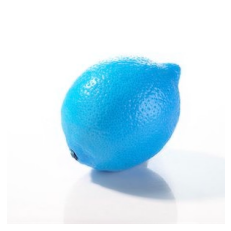

In [103]:
from PIL import Image
import matplotlib.pyplot as plt

image=input("Enter image path : ")
im = cv2.imread(image)
features=np.mean(im, axis=(0, 1)).tolist()
yp=clf.predict([features])
yp=encoder.inverse_transform(yp)
print('It is a '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()